In [ ]:
# import library , data
# remove null
# change representation
# split it
# built and train model
# evaluate model
# plot a graph

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# df_test = pd.read_csv("/content/sample_data/fashion-mnist_test.csv")
df_train = pd.read_csv("/content/sample_data/fashion-mnist_train.csv")

In [ ]:
df_test = pd.read_csv("/content/sample_data/fashion-mnist_test.csv")

In [ ]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.isnull().sum().unique()

array([0])

In [ ]:
df_test.isnull().sum().unique()

array([0, 1])

In [ ]:
df_test = df_test.fillna(df_test.mean())

In [ ]:
df_test.isnull().sum().unique()

array([0])

In [ ]:
x_train = np.array(df_train.iloc[:, 1:]).reshape(-1, 28, 28, 1) / 255.0
y_train = np.array(df_train["label"])

x_test = np.array(df_test.iloc[:, 1:]).reshape(-1, 28, 28, 1) / 255.0
y_test = np.array(df_test["label"])

In [ ]:
df_train["label"].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

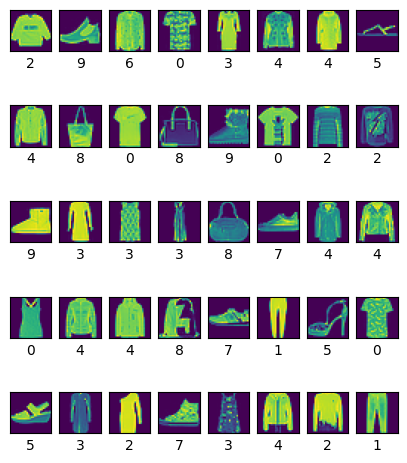

In [ ]:
plt.figure(figsize=(5,6))
for i in range (0 , 40):
  plt.subplot(5,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

# class = [0, 1,2,3,4,5,6,7,8,9]
classes = ["t-shirt", "pant","sweater","dress","coat","sandel","shirt","sneaker","bag","ankle boot"]

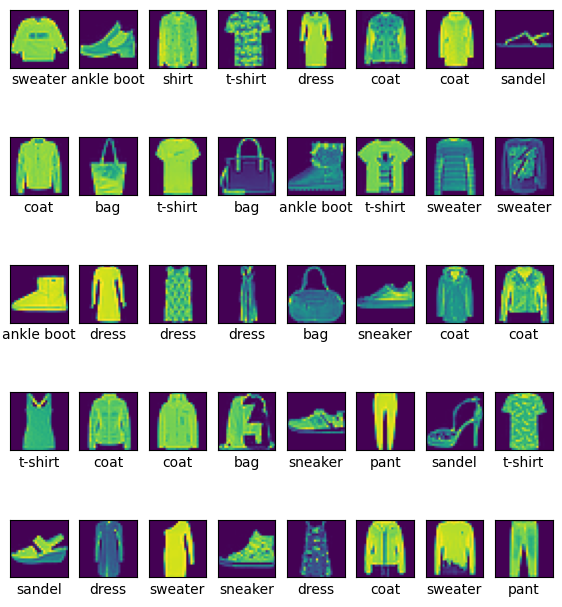

In [ ]:
plt.figure(figsize=(7,8))
for i in range (0 , 40):
  plt.subplot(5,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i]])
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten , Dense
model = Sequential()

model.add(Conv2D(activation = "relu" , input_shape = (28, 28, 1), filters=64, kernel_size=(3,3)))
model.add( MaxPooling2D( pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(loss= "sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.8233 - loss: 0.5039
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9045 - loss: 0.2599
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9212 - loss: 0.2127
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9360 - loss: 0.1740
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.9460 - loss: 0.1484


In [ ]:

# from sklearn.metrics import evaluate
# gives loss and accuracy
# loss : calculates the difference between the predicted and actual values.
# accuracy :  the percentage of correct predictions
evaluation = model.evaluate(x_test,y_test)
evaluation



148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9117 - loss: 0.2531


[0.24792423844337463, 0.9141949415206909]

In [ ]:
print(f"Accuracy: {evaluation[1]}")

Accuracy: 0.9141949415206909


In [ ]:
y_pred = model.predict(x_test)

y_pred

148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


array([[9.9962717e-01, 5.8777117e-10, 2.4501283e-05, ..., 7.4855500e-08,
        5.3599229e-07, 2.7921057e-10],
       [6.5165374e-08, 9.9999946e-01, 2.3329547e-10, ..., 5.0277377e-16,
        6.0051839e-11, 3.1994400e-13],
       [6.0242176e-02, 1.2938155e-09, 8.7762684e-01, ..., 2.3076485e-07,
        6.2245579e-07, 3.5971829e-07],
       ...,
       [1.7966214e-03, 2.9777010e-07, 6.5239882e-01, ..., 1.5054879e-07,
        6.6110588e-05, 1.2094761e-06],
       [1.7170761e-07, 7.2904143e-08, 5.8969092e-09, ..., 1.4925585e-07,
        1.1622073e-09, 1.2972089e-05],
       [2.0409504e-02, 6.2962972e-05, 1.1612717e-05, ..., 4.1541001e-03,
        2.9251385e-01, 6.5587898e-04]], dtype=float32)

In [ ]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([0, 1, 2, ..., 2, 5, 6])

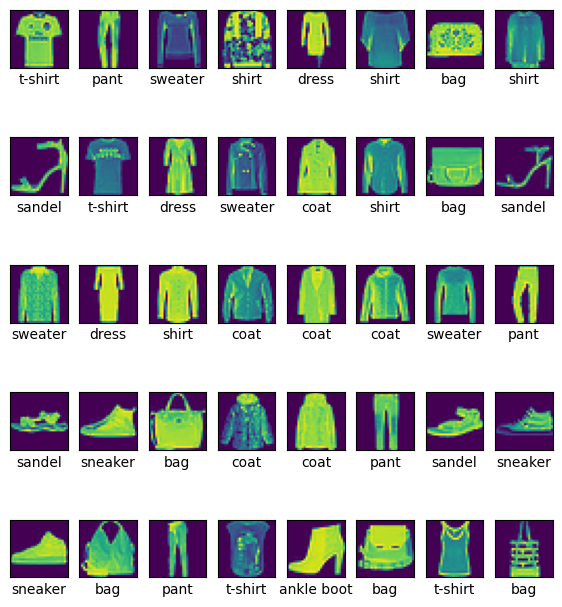

In [ ]:

plt.figure(figsize=(7,8))
for i in range (0 , 40):
  plt.subplot(5,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i])
  plt.xlabel(classes[y_pred[i]])
plt.show()